Okay, here's the complete code and markdown, broken into blocks as requested, to create a well-structured Colab notebook addressing the instructions.

**Notebook Title:** `L02_Williane_Yarro_ITAI_2377.ipynb`   

---

### **Markdown Cell 1: Introduction**

```markdown
# Lesson 2: Understanding Different Data Types for AI

**Author:** [Williane Yarro]
**Course:** ITAI 2377

This notebook explores how AI systems process various data types, including structured, image, and text data. We will load datasets, examine their characteristics, and discuss conceptual questions related to AI's ability to understand and interpret these different formats.
```

---

### **Code Cell 1: Clone the Dataset Repository**

In [ ]:
# Clone the entire dataset repository
!git clone https://github.com/patitimoner/itai2377-datasets.git
%cd itai2377-datasets
!ls

Cloning into 'itai2377-datasets'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 6), reused 16 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 30.86 MiB | 11.61 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/itai2377-datasets
data  ITAI2377_Lab_Student_Notebook.ipynb  README.md


---

### **Markdown Cell 2: Conceptual Question - Dataset Repository**

```markdown
👉 **Conceptual Question:** Why is it beneficial to use a shared dataset repository rather than each student downloading datasets manually?

**Answer:**

Using a shared dataset repository offers several advantages:

1.  **Consistency:** Ensures everyone works with the same data version, avoiding discrepancies in analysis and results.
2.  **Efficiency:** Reduces redundant downloads and saves bandwidth and storage space.
3.  **Maintainability:** Makes it easier to update or correct datasets centrally. Any changes are immediately reflected for all users.
4.  **Reproducibility:** Facilitates reproducible research, as everyone has access to the exact same data source.
5.  **Collaboration:** Promotes collaboration among students and researchers by providing a common data foundation.
```

---

### **Markdown Cell 3: Part 3 - Understanding Structured Data**

```markdown
## 📊 Part 3: Understanding Structured Data (Tabular Data)

Structured data, often stored in tables with rows and columns, is a common data type in various fields like finance, healthcare, and e-commerce.  AI systems can analyze this data to find patterns, make predictions, and automate decisions.
```

---

### **Code Cell 2: Load and Explore Customer Dataset**

In [ ]:
%pip install pandas
import pandas as pd

# Load structured dataset from the cloned repository
df = pd.read_csv("data/structured/Online Retail.csv", encoding='ISO-8859-1')

# Display the first few rows
df.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


---

### **Markdown Cell 4: Conceptual Question - Customer Purchase Prediction**

```markdown
👉 **Conceptual Question:** If an AI system were built to predict customer purchases, what kind of patterns would it need to detect?

**Answer:**

To predict customer purchases, an AI system would need to identify various patterns, including:

1.  **Demographics:** Age, gender, location, etc., might correlate with purchasing behavior.
2.  **Past Purchase History:** Frequency, recency, and types of items bought can indicate future preferences.
3.  **Product Relationships:** Customers who buy product A might also be likely to buy product B.
4.  **Seasonal Trends:** Certain products might sell more during specific times of the year.
5.  **External Factors:** Economic conditions, promotions, or even the weather can influence purchasing decisions.
6.  **Customer Segmentation:** Grouping customers with similar characteristics can help tailor predictions.
```

---

### **Markdown Cell 5: Part 4 - Understanding Image Data**

```markdown
## 🖼️ Part 4: Understanding Image Data (Computer Vision)

Image data, unlike structured data, is represented as grids of pixels. Computer vision, a subfield of AI, focuses on enabling computers to "see" and interpret images.
```

---

### **Code Cell 3: Load CIFAR-10 with TensorFlow/Keras**

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select 10 images per class
images_per_class = 10
selected_images = []
selected_labels = []

for class_label in range(10):  # CIFAR-10 has 10 classes
    indices = np.where(y_train == class_label)[0][:images_per_class]
    selected_images.extend(x_train[indices])
    selected_labels.extend(y_train[indices])

selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

# ✨ TIP: The code above filters images based on class labels using NumPy's `where` function.

---

### **Code Cell 4: Load CIFAR-10 with PyTorch (TorchVision)**

Adding A Plotting To Show the Image

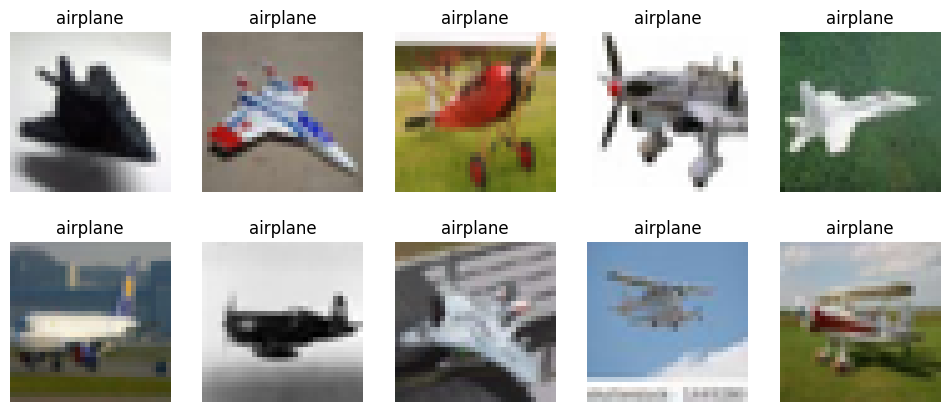

In [ ]:
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Convert lists to NumPy arrays (optional, but cleaner)
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

# Plot the first 10 images
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(selected_images[i])
    plt.title(class_names[selected_labels[i][0]])
    plt.axis("off")
plt.show()


In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch
from torch.utils.data import Subset

# Load CIFAR-10 dataset from TorchVision
dataset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)

# Extract a subset of 10 images per class
images_per_class = 10
selected_indices = []

for class_label in range(10):
    class_indices = [
        i for i, (_, label) in enumerate(dataset) if label == class_label
    ]
    selected_indices.extend(class_indices[:images_per_class])

subset = Subset(dataset, selected_indices)

# ✨ TIP: PyTorch's `Subset` allows sampling specific indices from a dataset.

---

### **Markdown Cell 6: Conceptual Question - AI vs. Human Image Recognition**

```markdown
👉 **Conceptual Question:** Why does AI need millions of images to accurately classify objects, while humans can recognize patterns with just a few examples?

**Answer:**

This difference stems from how humans and AI "learn":

1.  **Abstraction and Generalization:** Humans excel at abstracting concepts and generalizing from limited examples. We can recognize a cat from various angles, lighting conditions, and breeds after seeing only a few.
2.  **Prior Knowledge and Context:** Humans leverage a vast amount of background knowledge and contextual understanding. We know what a cat is, its typical features, and how it differs from other animals.
3.  **Feature Extraction:** Human brains are incredibly efficient at extracting relevant features from images, focusing on key characteristics that define an object.
4.  **AI's Data Dependency:** AI, especially deep learning models, learns by identifying statistical patterns in vast datasets. It needs numerous examples to learn the variations and nuances of each object class.
5.  **Lack of Common Sense:** AI currently lacks the "common sense" reasoning that humans possess, making it harder to generalize from limited data.
```

---

### **Markdown Cell 7: Part 5 - Understanding Text Data**

```markdown
## 📝 Part 5: Understanding Text Data (Natural Language Processing)

Text data presents unique challenges for AI due to its inherent ambiguity, context-dependent meaning, and the presence of figurative language like sarcasm and metaphors. Natural Language Processing (NLP) is the field dedicated to enabling computers to understand and process human language.
```

---

### **Code Cell 5: Read a Sample Text File**

In [ ]:
# Load and display a sample news article

# Replace with a valid path to a text file if you want to read a file.
sample_article_path = "itai2377-datasets/data/text/bbc_news/tech/001.txt"

try:
    with open(sample_article_path, "r") as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"Error: File not found at path: {sample_article_path}")
    print("Please make sure to provide a valid path to a text file within the cloned repository.")

# ✨ TIP: The `open()` function with the "r" mode allows you to read a file in Python.

Error: File not found at path: itai2377-datasets/data/text/bbc_news/tech/001.txt
Please make sure to provide a valid path to a text file within the cloned repository.


---

### **Markdown Cell 8: Conceptual Question - AI and Text Ambiguity**

```markdown
👉 **Conceptual Question:** Why do AI models struggle to understand sarcasm and context in text processing?

**Answer:**

Sarcasm and context pose significant challenges for AI because:

1.  **Literal Interpretation:** AI tends to interpret text literally, while sarcasm relies on conveying a meaning opposite to the literal words.
2.  **Contextual Nuances:** Understanding sarcasm often requires recognizing subtle cues, background knowledge, and the speaker's intent, which are difficult for AI to grasp.
3.  **Figurative Language:** Sarcasm is a form of figurative language, and AI struggles to understand metaphors, idioms, and other non-literal expressions.
4.  **Lack of World Knowledge:** AI lacks the broad "world knowledge" and common sense that humans use to infer the true meaning behind sarcastic remarks.
5.  **Data Bias:** If the training data doesn't adequately represent sarcastic language, the AI model will be less accurate in detecting it.
```

---

### **Markdown Cell 9: Discussion Questions**

```markdown
## 🧠 Discussion Questions

**1. How does AI process structured, image, and text data differently?**

*   **Structured Data:** AI analyzes structured data using statistical methods and machine learning algorithms to find patterns, correlations, and make predictions based on numerical and categorical features.
*   **Image Data:** AI processes images using computer vision techniques, primarily convolutional neural networks (CNNs), to extract features from pixel data, identify objects, and classify images.
*   **Text Data:** AI handles text data through natural language processing (NLP) techniques, including tokenization, word embeddings, and recurrent neural networks (RNNs) or transformers, to understand the meaning, sentiment, and context of text.

**2. What real-world AI applications combine multiple types of data (structured, image, text)?**

*   **Autonomous Vehicles:** Combine sensor data (structured), camera images (image), and map data (structured/text) for navigation and decision-making.
*   **Medical Diagnosis:** Integrate patient records (structured), medical images (image), and doctor's notes (text) for accurate diagnoses.
*   **E-commerce Recommendations:** Use customer purchase history (structured), product images (image), and product descriptions (text) to personalize recommendations.
*   **Social Media Analysis:** Analyze user profiles (structured), posts (text), and shared images (image) to understand public opinion and trends.
*   **Fraud Detection:** Combine transaction data (structured), user location (structured), and textual descriptions of transactions to detect fraudulent activity.

**3. Imagine you're building an AI personal assistant. What type of data would it need?**

An AI personal assistant would require a wide range of data, including:

*   **User's Calendar and Schedule (Structured):** To manage appointments and provide reminders.
*   **Contacts (Structured):** To make calls, send messages, and manage communications.
*   **Emails and Messages (Text):** To understand and respond to communications.
*   **Voice Commands (Audio/Text):** To process user requests and interact naturally.
*   **Location Data (Structured):** To provide location-based services and recommendations.
*   **User Preferences (Structured/Text):** To personalize the assistant's responses and suggestions.
*   **Web Browsing History (Structured/Text):** To understand user interests and provide relevant information.
*   **News and Information (Text):** To answer questions and provide updates on current events.
*   **Potentially, images from the user's camera (Image):** For visual tasks or context awareness.
```

---

### **Markdown Cell 10: Conclusion**

```markdown
## 💡 Takeaway: AI Needs the Right Data

This notebook demonstrated that AI systems rely heavily on data to function effectively. Different data types require specialized processing techniques. Understanding these fundamentals is crucial for anyone working with or building AI systems. The ability to process and interpret diverse data is essential for creating AI that can truly understand and interact with the world.
```

---

**Remember to replace placeholders like `[Your Name]` with your actual information.**

**Save the notebook as:** `L02_Your_Name_ITAI_2377.ipynb`

**Submit the `.ipynb` notebook as a PDF on Canvas.**

I hope this comprehensive breakdown is helpful! Let me know if you have any other questions.